In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings(action='ignore')

In [5]:
df=pd.read_csv('D:/COMP_DSBDAL_MOCK/housing_data.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
df.shape

(506, 14)

This data set has 14 features and 506 rows i.e. details of 506 houses.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

<Axes: >

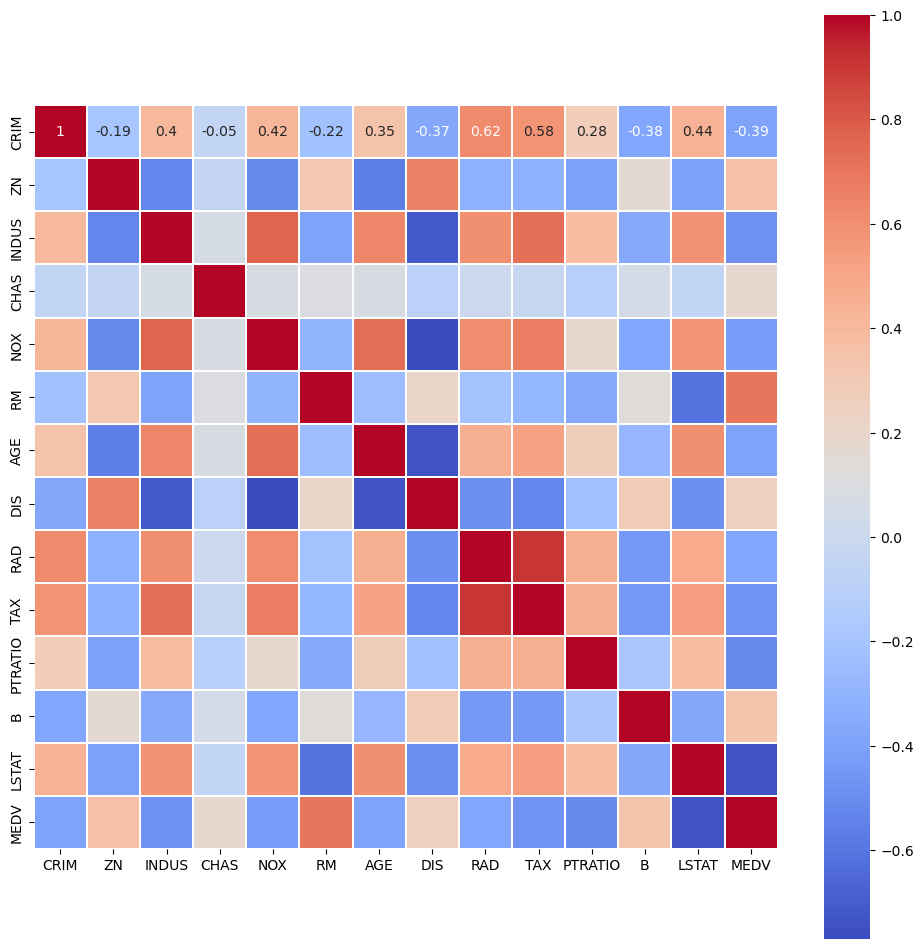

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

In [10]:
#since some of these features shows quite good and very good correlation with our predictive variable Houese Price(MEDV)
df1 = df[['RM','TAX','PTRATIO','LSTAT','MEDV']]
df1.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
0,6.575,296,15.3,4.98,24.0
1,6.421,242,17.8,9.14,21.6
2,7.185,242,17.8,4.03,34.7
3,6.998,222,18.7,2.94,33.4
4,7.147,222,18.7,NaN,36.2


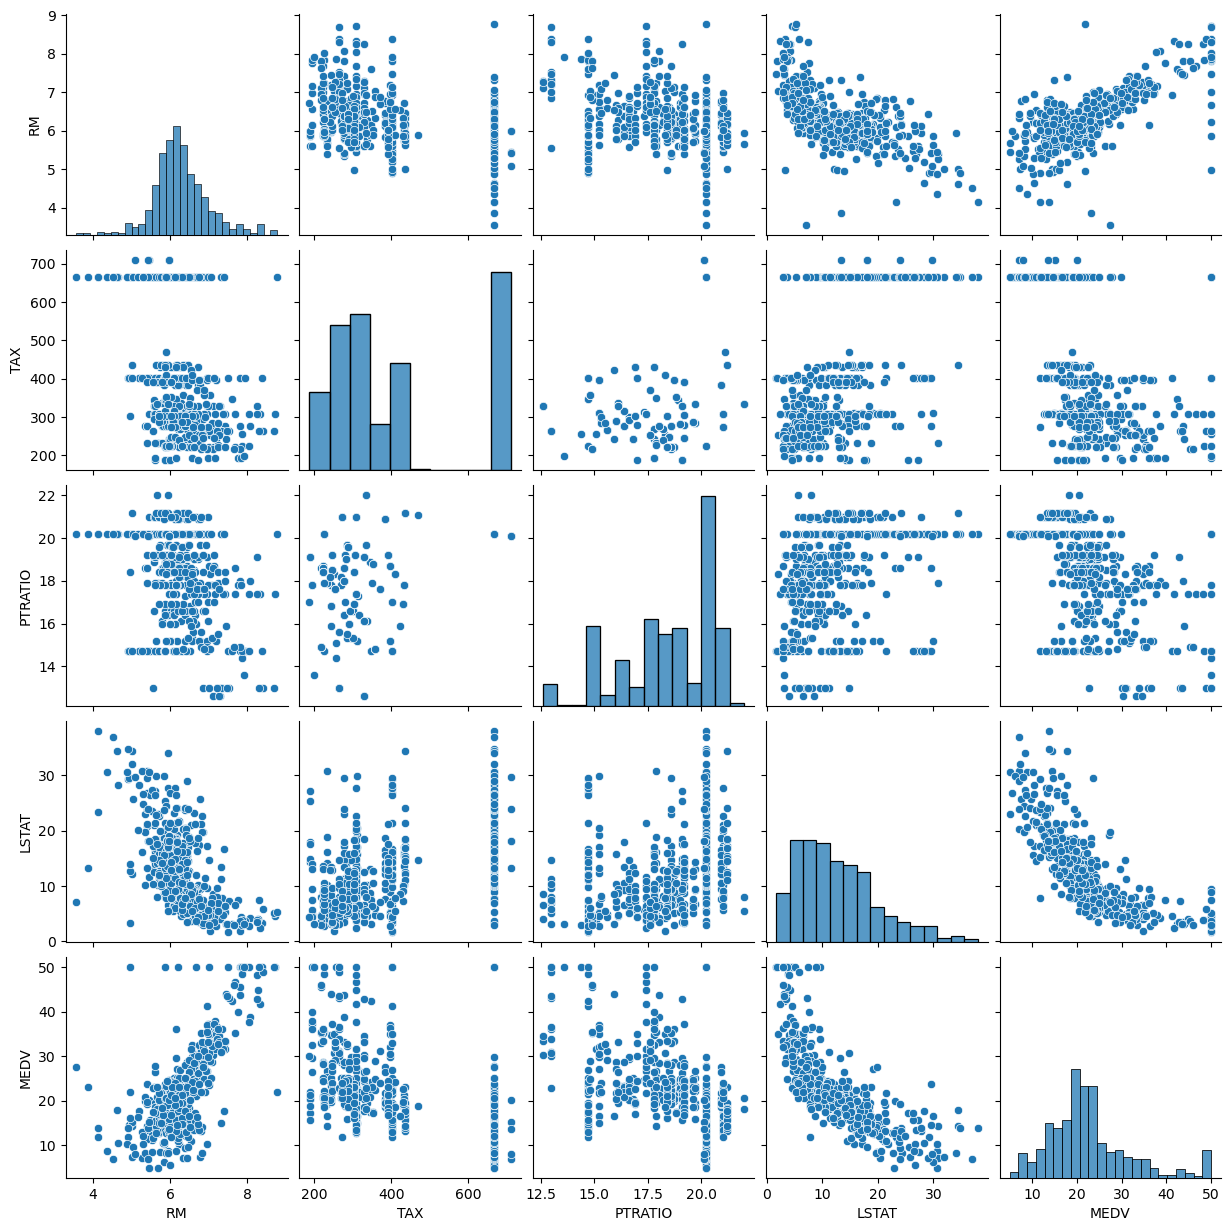

In [11]:
sns.pairplot(data=df1)

In [12]:
desc = df1.describe().round(2)
desc

,RM,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,486.00,506.00
mean,6.28,408.24,18.46,12.72,22.53
std,0.70,168.54,2.16,7.16,9.20
min,3.56,187.00,12.60,1.73,5.00
25%,5.89,279.00,17.40,7.12,17.02
50%,6.21,330.00,19.05,11.43,21.20
75%,6.62,666.00,20.20,16.96,25.00
max,8.78,711.00,22.00,37.97,50.00


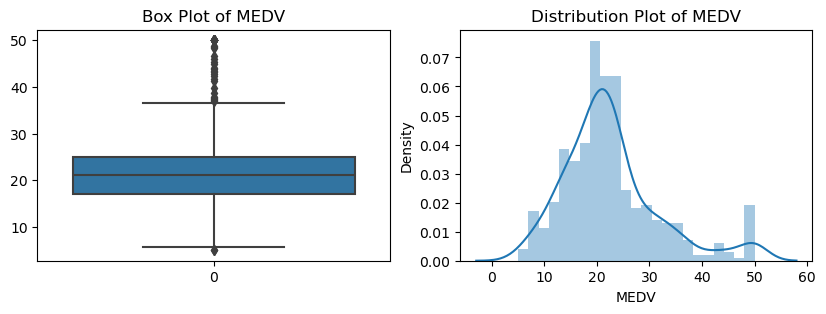

In [24]:
#Box Plot and Distribution Plot for Dependent variable MEDV
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.boxplot(df1.MEDV)
plt.title('Box Plot of MEDV')

plt.subplot(1,2,2)
sns.distplot(df1.MEDV)
plt.title('Distribution Plot of MEDV')
plt.show()

In [14]:
MEDV_Q3 = desc['MEDV']['75%']
MEDV_Q1 = desc['MEDV']['25%']
MEDV_IQR = MEDV_Q3 - MEDV_Q1
MEDV_UV = MEDV_Q3 + 1.5*MEDV_IQR
MEDV_LV = MEDV_Q1 - 1.5*MEDV_IQR

df1[df1['MEDV']<MEDV_LV]

,RM,TAX,PTRATIO,LSTAT,MEDV
398,5.453,666,20.2,30.59,5.0
405,5.683,666,20.2,22.98,5.0


In [15]:
df1[df1['MEDV']>MEDV_UV].sort_values(by=['MEDV','RM'])

,RM,TAX,PTRATIO,LSTAT,MEDV
190,6.951,398,15.2,5.10,37.0
179,6.980,193,17.8,5.04,37.2
291,7.148,245,19.2,3.56,37.3
226,8.040,307,17.4,NaN,37.6
182,7.155,193,17.8,4.82,37.9
97,8.069,276,18.0,4.21,38.7
180,7.765,193,17.8,7.56,39.8
157,6.943,403,14.7,4.59,41.3
232,8.337,307,17.4,2.47,41.7
202,7.610,348,14.7,3.11,42.3


In [16]:
print(f'Shape of dataset before remving Outliers: {df1.shape}')
df2 = df1[~(df1['MEDV']==50)]
print(f'Shape of dataset after remving Outliers: {df2.shape}')

Shape of dataset before remving Outliers: (506, 5)
Shape of dataset after remving Outliers: (490, 5)


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

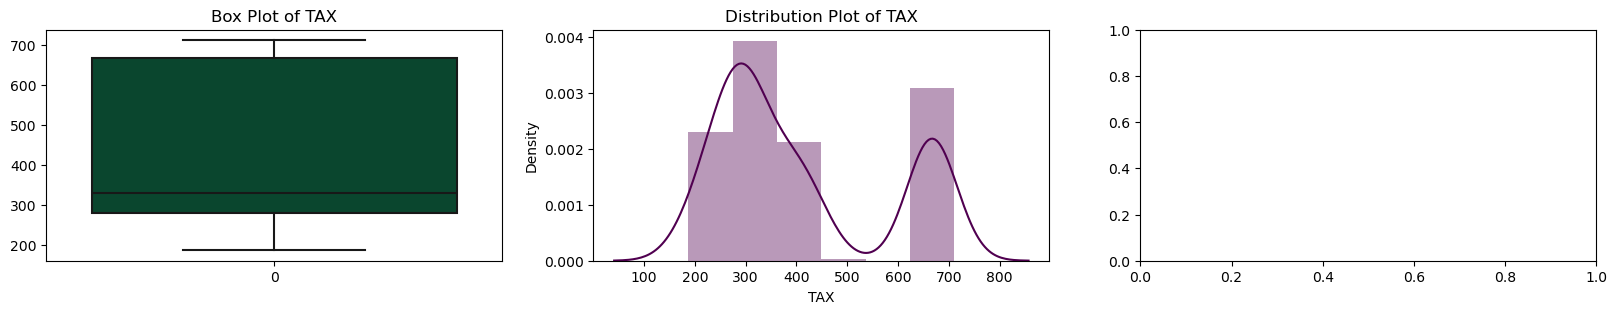

In [17]:
#Box Plot, Distribution Plot and Scatter Plot for TAX
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.TAX,color='#005030')
plt.title('Box Plot of TAX')

plt.subplot(1,3,2)
sns.distplot(a=df2.TAX,color='#500050')
plt.title('Distribution Plot of TAX')

plt.subplot(1,3,3)
sns.scatterplot(df2.TAX,df2.MEDV)
plt.title('Scatter Plot of TAX vs MEDV')

plt.show()

In [ ]:
temp_df = df2[df1['TAX']>600].sort_values(by=['RM','MEDV'])
temp_df.shape

In [ ]:
temp_df

In [ ]:
temp_df.describe()

In [ ]:
TAX_10 = df2[(df2['TAX']<600) & (df2['LSTAT']>=0) & (df2['LSTAT']<10)]['TAX'].mean()
TAX_20 = df2[(df2['TAX']<600) & (df2['LSTAT']>=10) & (df2['LSTAT']<20)]['TAX'].mean()
TAX_30 = df2[(df2['TAX']<600) & (df2['LSTAT']>=20) & (df2['LSTAT']<30)]['TAX'].mean()
TAX_40 = df2[(df2['TAX']<600) & (df2['LSTAT']>=30)]['TAX'].mean()

indexes = list(df2.index)
for i in indexes:
    if df2['TAX'][i] > 600:
        if (0 <= df2['LSTAT'][i] < 10):
            df2.at[i,'TAX'] = TAX_10
        elif (10 <= df2['LSTAT'][i] < 20):
            df2.at[i,'TAX'] = TAX_20
        elif (20 <= df2['LSTAT'][i] < 30):
            df2.at[i,'TAX'] = TAX_30
        elif (df2['LSTAT'][i] >30):
            df2.at[i,'TAX'] = TAX_40

print('Values imputed successfully')

In [ ]:
df2[df2['TAX']>600]['TAX'].count()

In [ ]:
sns.distplot(a=df2.TAX,color='#500050')
plt.title('Distribution Plot of TAX after replacing extreme values')
plt.show()

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.PTRATIO,color='#005030')
plt.title('Box Plot of PTRATIO')

plt.subplot(1,3,2)
sns.distplot(a=df2.PTRATIO,color='#500050')
plt.title('Distribution Plot of PTRATIO')

plt.subplot(1,3,3)
sns.scatterplot(df2.PTRATIO,df2.MEDV)
plt.title('Scatter Plot of PTRATIO vs MEDV')

plt.show()

In [ ]:
df2[df2['PTRATIO']<14].sort_values(by=['LSTAT','MEDV'])

In [ ]:
#Box Plot, Distribution Plot and Scatter Plot for LSTAT
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.LSTAT,color='#005030')
plt.title('Box Plot of LSTAT')

plt.subplot(1,3,2)
sns.distplot(a=df2.LSTAT,color='#500050')
plt.title('Distribution Plot of LSTAT')

plt.subplot(1,3,3)
sns.scatterplot(df2.LSTAT,df2.MEDV)
plt.title('Scatter Plot of LSTAT vs MEDV')

plt.show()

In [ ]:
LSTAT_Q3 = desc['LSTAT']['75%']
LSTAT_Q1 = desc['LSTAT']['25%']
LSTAT_IQR = LSTAT_Q3 - LSTAT_Q1
LSTAT_UV = LSTAT_Q3 + 1.5*LSTAT_IQR
LSTAT_LV = LSTAT_Q1 - 1.5*LSTAT_IQR

df2[df2['LSTAT']>LSTAT_UV].sort_values(by='LSTAT')

In [ ]:
#Box Plot, Distribution Plot and Scatter Plot for RM
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.RM,color='#005030')
plt.title('Box Plot of MEDV')

plt.subplot(1,3,2)
sns.distplot(a=df2.RM,color='#500050')
plt.title('Distribution Plot of MEDV')

plt.subplot(1,3,3)
sns.scatterplot(df2.RM,df2.MEDV)
plt.title('Scatter Plot of RM vs MEDV')

plt.show()

In [ ]:
RM_Q3 = desc['RM']['75%']
RM_Q1 = desc['RM']['25%']
RM_IQR = RM_Q3 - RM_Q1
RM_UV = RM_Q3 + 1.5*RM_IQR
RM_LV = RM_Q1 - 1.5*RM_IQR

df2[df2['RM']<RM_LV].sort_values(by=['RM','MEDV'])

In [ ]:
print(f'Shape of dataset before removing data points: {df2.shape}')
df3 = df2.drop(axis=0,index=[365,367])
print(f'Shape of dataset before removing data points: {df3.shape}')

In [ ]:
df3[df3['RM']>RM_UV].sort_values(by=['RM','MEDV'])

In [ ]:
print(f'Shape of dataset before removing data points: {df3.shape}')
df3 = df3.drop(axis=0,index=[364])
print(f'Shape of dataset before removing data points: {df3.shape}')

In [ ]:
X = df3.iloc[:,0:4].values
y = df3.iloc[:,-1:].values

In [ ]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

In [ ]:
def FeatureScaling(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i]-mean[i])/std[i]

    return X

In [ ]:
X = FeatureScaling(X)

Set of Independent variables X is now scaled down.

In [ ]:
m,n = X.shape
X = np.append(arr=np.ones((m,1)),values=X,axis=1)

In [ ]:
#Now we will spit our data into Train set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

In [ ]:
def ComputeCost(X,y,theta):
    """
    This function takes three inputs and uses the Cost Function to determine the cost (basically error of prediction vs
    actual values)
    Cost Function: Sum of square of error in predicted values divided by number of data points in the set
    J = 1/(2*m) *  Summation(Square(Predicted values - Actual values))

    Input <- Take three numoy array X,y and theta
    Return -> The cost calculated from the Cost Function
    """
    m=X.shape[0] #number of data points in the set
    J = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
    return J

In [ ]:
#Gradient Descent Algorithm to minimize the Cost and find best parameters in order to get best line for our dataset

def GradientDescent(X,y,theta,alpha,no_of_iters):
    """
    Gradient Descent Algorithm to minimize the Cost

    Input <- X, y and theta are numpy arrays
            X -> Independent Variables/ Features
            y -> Dependent/ Target Variable
            theta -> Parameters
            alpha -> Learning Rate i.e. size of each steps we take
            no_of_iters -> Number of iterations we want to perform

    Return -> theta (numpy array) which are the best parameters for our dataset to fit a linear line
             and Cost Computed (numpy array) for each iteration
    """
    m=X.shape[0]
    J_Cost = []
    for i in range(no_of_iters):
        error = np.dot(X.transpose(),(X.dot(theta)-y))
        theta = theta - alpha * (1/m) * error
        J_Cost.append(ComputeCost(X,y,theta))

    return theta, np.array(J_Cost)

In [ ]:
iters = 1000

alpha1 = 0.001
theta1 = np.zeros((X_train.shape[1],1))
theta1, J_Costs1 = GradientDescent(X_train,y_train,theta1,alpha1,iters)

alpha2 = 0.003
theta2 = np.zeros((X_train.shape[1],1))
theta2, J_Costs2 = GradientDescent(X_train,y_train,theta2,alpha2,iters)

alpha3 = 0.01
theta3 = np.zeros((X_train.shape[1],1))
theta3, J_Costs3 = GradientDescent(X_train,y_train,theta3,alpha3,iters)

alpha4 = 0.03
theta4 = np.zeros((X_train.shape[1],1))
theta4, J_Costs4 = GradientDescent(X_train,y_train,theta4,alpha4,iters)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(J_Costs1,label = 'alpha = 0.001')
plt.plot(J_Costs2,label = 'alpha = 0.003')
plt.plot(J_Costs3,label = 'alpha = 0.01')
plt.plot(J_Costs4,label = 'alpha = 0.03')
plt.title('Convergence of Gradient Descent for different values of alpha')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [ ]:
theta4

In [ ]:
def Predict(X,theta):
    y_pred = X.dot(theta)
    return y_pred

In [ ]:
y_pred = Predict(X_test,theta4)
y_pred[:5]

In [ ]:
plt.scatter(x=y_test,y=y_pred,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

In [ ]:
sns.residplot(y_pred,(y_pred-y_test))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

In [ ]:
sns.distplot(y_pred-y_test)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

In [ ]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse}',f'Mean Absolute Error: {mae}',f'Root Mean Squared Error: {rmse}',sep='\n')

In [ ]:
#coefficients of regression model
coeff=np.array([y for x in theta4 for y in x]).round(2)
features=['Bias','RM','TAX','PTRATIO','LSTAT']
eqn = 'MEDV = '
for f,c in zip(features,coeff):
    eqn+=f" + ({c} * {f})";

print(eqn)

In [ ]:
sns.barplot(x=features,y=coeff)
plt.ylim([-5,25])
plt.xlabel('Coefficient Names',size=12)
plt.ylabel('Coefficient Values',size=12)
plt.title('Visualising Regression Coefficients',size=15)
plt.show()